In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-17/07-38-28/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. that: 0.1016
	2. <d0>: 0.0976
	3. static: 0.0912
	4. turn: 0.0879
	5. angle: 0.0875
	6. white: 0.0862
	7. figure: 0.0854
	8. cyan: 0.0791
	9. transparent: 0.0782
	10. crimson: 0.0768
	11. solid: 0.0764
	12. in: 0.0754
	13. is: 0.0748
	14. rotate: 0.0748
	15. blank: 0.0733
	16. locate: 0.0732
	17. unrotate: 0.0719
	18. canvas: 0.0711
	19. picture: 0.0698
	20. up: 0.0696
	21. right: 0.0691
	22. with: 0.0684
	23. position: 0.0673
	24. bottom: 0.0669
	25. red: 0.0662
	26. left: 0.0657
	27. image: 0.0649
	28. background: 0.0649
	29. this: 0.0648
	30. unturn: 0.0640
	31. azure: 0.0620
	32. scarlet: 0.0618
	33. shape: 0.0616
	34. the: 0.0615
	35. photo: 0.0593
	36. corner: 0.0592
	37. fix: 0.0571
	38. quadratic: 0.0569
	39. form: 0.0558
	40. shade: 0.0547
	41. have: 0.0484
	42. four: 0.0481
	43. color: 0.0389
	44. blue: 0.0349
	45. three: 0.0252
	46. green: 0.0217
	47. triangular: 0.0191
	48. lime: 0.0184
	49. olive: 0.0108
	50. no:

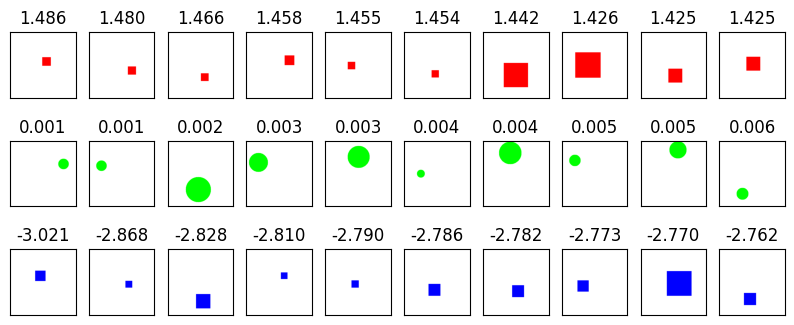

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. <d1>: 0.4454
	2. three: 0.3610
	3. olive: 0.3214
	4. green: 0.3016
	5. triangular: 0.2514
	6. lime: 0.2185
	7. scarlet: 0.2069
	8. color: 0.1159
	9. circular: 0.1010
	10. shade: 0.0956
	11. with: 0.0934
	12. four: 0.0708
	13. have: 0.0653
	14. round: 0.0572
	15. red: 0.0571
	16. locate: 0.0534
	17. background: 0.0469
	18. outline: 0.0453
	19. no: 0.0443
	20. turn: 0.0402
	21. static: 0.0338
	22. crimson: 0.0321
	23. blue: 0.0315
	24. position: 0.0312
	25. cyan: 0.0286
	26. azure: 0.0278
	27. canvas: 0.0243
	28. unturn: 0.0219
	29. fix: 0.0178
	30. white: 0.0175
	31. angle: 0.0165
	32. right: 0.0157
	33. blank: 0.0143
	34. unrotate: 0.0130
	35. corner: 0.0110
	36. that: 0.0093
	37. figure: 0.0091
	38. this: 0.0081
	39. image: 0.0077
	40. is: 0.0068
	41. transparent: 0.0056
	42. photo: 0.0048
	43. solid: 0.00

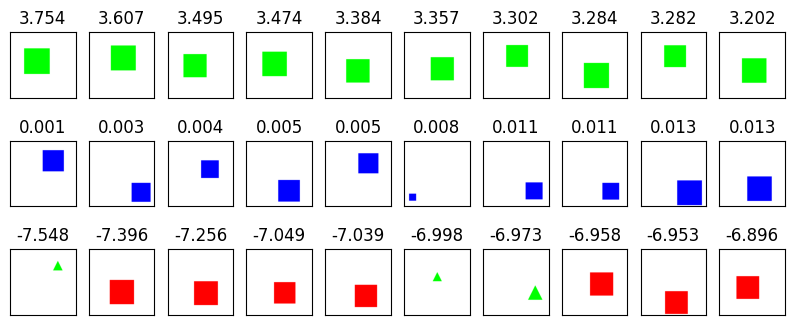

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. <d2>: 0.6803
	2. round: 0.5941
	3. circular: 0.5891
	4. no: 0.4202
	5. outline: 0.1873
	6. triangular: 0.1755
	7. three: 0.0797
	8. have: 0.0606
	9. with: 0.0433
	10. unturn: 0.0429
	11. color: 0.0294
	12. lime: 0.0264
	13. scarlet: 0.0132
	14. red: 0.0087
	15. four: 0.0075
	16. right: 0.0074
	17. position: 0.0068
	18. locate: 0.0062
	19. solid: 0.0056
	20. azure: 0.0045
	21. olive: 0.0044
	22. figure: 0.0042
	23. angle: 0.0042
	24. shade: 0.0039
	25. up: 0.0038
	26. form: 0.0037
	27. fix: 0.0034
	28. turn: 0.0031
	29. cyan: 0.0027
	30. unrotate: 0.0023
	31. background: 0.0020
	32. that: 0.0019
	33. green: 0.0017
	34. crimson: 0.0017
	35. blue: 0.0015
	36. white: 0.0008
	37. this: 0.0008
	38. is: 0.0007
	39. image: 0.0007
	40. transparent: 0.0006
	41. blank: 0.0005
	42. static: 0.0005
	43. picture: 0.0005
	

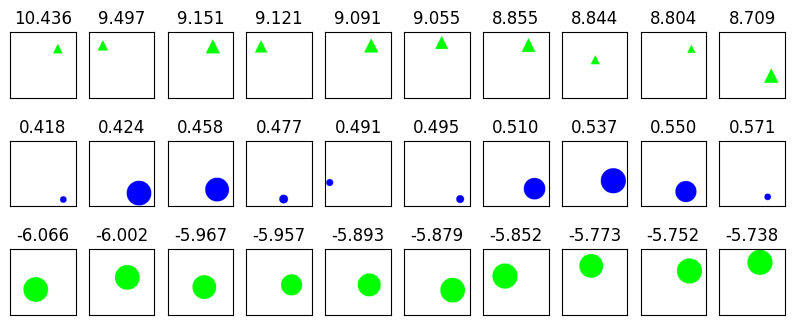

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. <d3>: 0.2193
	2. quadratic: 0.1695
	3. unturn: 0.1203
	4. azure: 0.1101
	5. blue: 0.1082
	6. is: 0.1029
	7. color: 0.0930
	8. this: 0.0855
	9. blank: 0.0843
	10. static: 0.0762
	11. the: 0.0739
	12. that: 0.0736
	13. with: 0.0718
	14. up: 0.0711
	15. turn: 0.0697
	16. fix: 0.0684
	17. background: 0.0683
	18. locate: 0.0676
	19. unrotate: 0.0662
	20. shade: 0.0652
	21. have: 0.0635
	22. form: 0.0581
	23. cyan: 0.0563
	24. red: 0.0535
	25. in: 0.0523
	26. rotate: 0.0513
	27. white: 0.0512
	28. image: 0.0497
	29. figure: 0.0494
	30. photo: 0.0460
	31. position: 0.0458
	32. angle: 0.0456
	33. shape: 0.0428
	34. crimson: 0.0409
	35. canvas: 0.0403
	36. picture: 0.0396
	37. transparent: 0.0379
	38. solid: 0.0356
	39. left: 0.0341
	40. triangular: 0.0330
	41. corner: 0.0327
	42. scarlet: 0.0298
	43. right: 0.0283


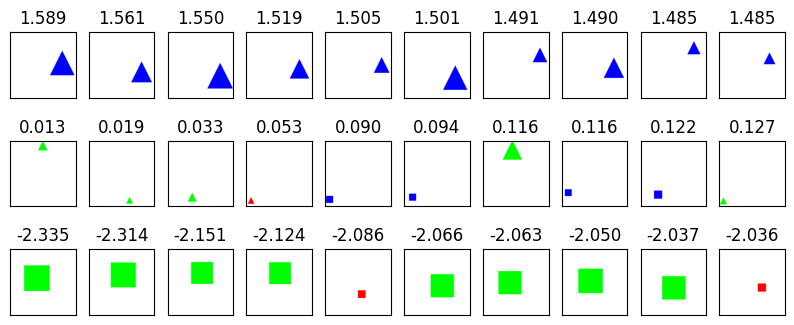

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. no: 0.4345
	2. <d4>: 0.4341
	3. outline: 0.3448
	4. circular: 0.3351
	5. round: 0.2572
	6. have: 0.1778
	7. triangular: 0.1556
	8. four: 0.1376
	9. figure: 0.0870
	10. with: 0.0822
	11. three: 0.0777
	12. lime: 0.0727
	13. unturn: 0.0638
	14. fix: 0.0620
	15. color: 0.0594
	16. position: 0.0506
	17. crimson: 0.0482
	18. red: 0.0423
	19. right: 0.0421
	20. locate: 0.0397
	21. scarlet: 0.0364
	22. unrotate: 0.0312
	23. azure: 0.0286
	24. solid: 0.0275
	25. angle: 0.0272
	26. form: 0.0267
	27. up: 0.0216
	28. that: 0.0204
	29. background: 0.0181
	30. green: 0.0175
	31. transparent: 0.0168
	32. this: 0.0161
	33. left: 0.0155
	34. cyan: 0.0147
	35. olive: 0.0142
	36. turn: 0.0127
	37. picture: 0.0123
	38. blue: 0.0117
	39. shade: 0.0114
	40. bottom: 0.0102
	41. canvas: 0.0065
	42. image: 0.0064
	43. static: 0.00

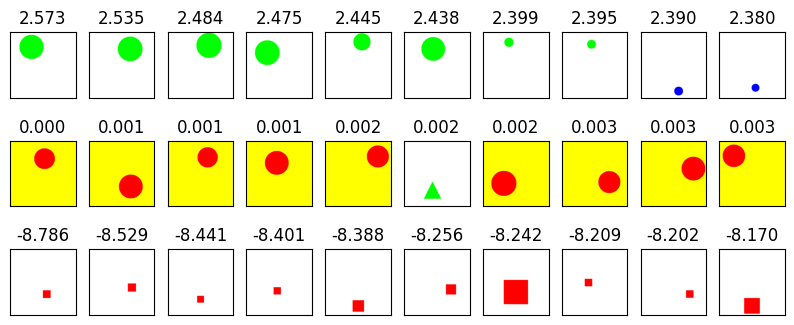

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. photo: 0.1130
	2. shape: 0.1095
	3. solid: 0.1031
	4. right: 0.1018
	5. form: 0.1016
	6. white: 0.0994
	7. the: 0.0960
	8. image: 0.0927
	9. corner: 0.0904
	10. picture: 0.0896
	11. position: 0.0877
	12. bottom: 0.0847
	13. cyan: 0.0847
	14. transparent: 0.0836
	15. red: 0.0810
	16. blank: 0.0808
	17. canvas: 0.0786
	18. angle: 0.0780
	19. is: 0.0750
	20. up: 0.0750
	21. left: 0.0742
	22. scarlet: 0.0737
	23. shade: 0.0732
	24. in: 0.0685
	25. turn: 0.0682
	26. background: 0.0668
	27. unrotate: 0.0621
	28. rotate: 0.0588
	29. static: 0.0587
	30. crimson: 0.0545
	31. locate: 0.0539
	32. that: 0.0534
	33. unturn: 0.0514
	34. <d5>: 0.0510
	35. this: 0.0493
	36. four: 0.0434
	37. figure: 0.0419
	38. fix: 0.0407
	39. with: 0.0399
	40. quadratic: 0.0396
	41. have: 0.0345
	42. color: 0.0337
	43. azure: 0.0281
	44.

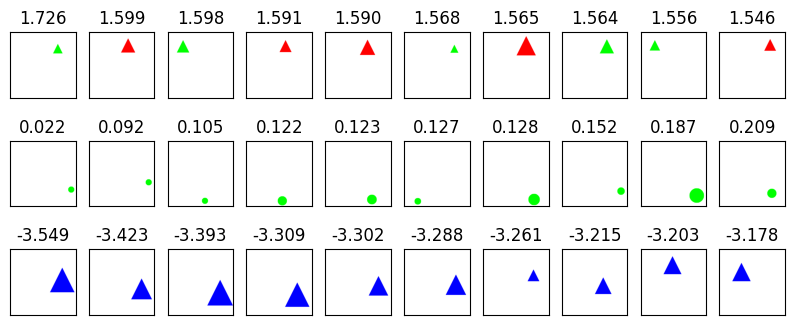

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. <d6>: 0.4171
	2. shade: 0.1751
	3. lime: 0.1405
	4. olive: 0.1275
	5. green: 0.1167
	6. turn: 0.0993
	7. scarlet: 0.0988
	8. color: 0.0974
	9. four: 0.0926
	10. red: 0.0886
	11. with: 0.0875
	12. cyan: 0.0827
	13. blank: 0.0766
	14. unturn: 0.0733
	15. three: 0.0710
	16. background: 0.0662
	17. blue: 0.0553
	18. triangular: 0.0516
	19. have: 0.0516
	20. white: 0.0475
	21. locate: 0.0444
	22. position: 0.0442
	23. crimson: 0.0416
	24. right: 0.0414
	25. static: 0.0395
	26. azure: 0.0392
	27. this: 0.0369
	28. canvas: 0.0348
	29. unrotate: 0.0331
	30. angle: 0.0296
	31. photo: 0.0283
	32. fix: 0.0277
	33. no: 0.0256
	34. form: 0.0254
	35. that: 0.0251
	36. corner: 0.0236
	37. circular: 0.0228
	38. figure: 0.0214
	39. is: 0.0212
	40. outline: 0.0174
	41. the: 0.0172
	42. picture: 0.0157
	43. transparent: 0.014

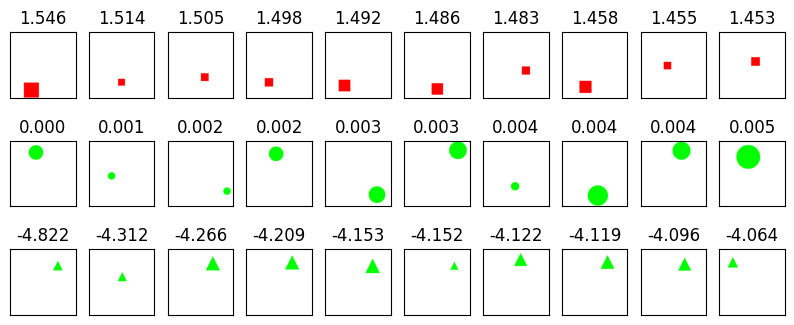

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. blue: 0.2439
	2. <d7>: 0.2081
	3. this: 0.1913
	4. azure: 0.1830
	5. fix: 0.1814
	6. figure: 0.1702
	7. quadratic: 0.1358
	8. unturn: 0.1196
	9. unrotate: 0.1163
	10. have: 0.1150
	11. crimson: 0.1128
	12. that: 0.0924
	13. color: 0.0824
	14. rotate: 0.0792
	15. with: 0.0692
	16. left: 0.0689
	17. up: 0.0650
	18. four: 0.0646
	19. blank: 0.0644
	20. static: 0.0595
	21. background: 0.0589
	22. form: 0.0548
	23. locate: 0.0521
	24. picture: 0.0521
	25. triangular: 0.0493
	26. red: 0.0464
	27. turn: 0.0452
	28. lime: 0.0420
	29. cyan: 0.0377
	30. position: 0.0375
	31. transparent: 0.0371
	32. angle: 0.0341
	33. canvas: 0.0338
	34. is: 0.0320
	35. bottom: 0.0301
	36. outline: 0.0300
	37. shade: 0.0276
	38. in: 0.0262
	39. round: 0.0208
	40. right: 0.0201
	41. circular: 0.0181
	42. olive: 0.0178
	43. three: 0.01

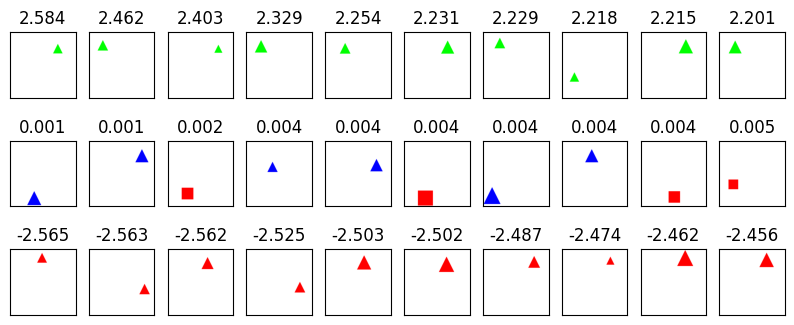

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. <d8>: 0.3440
	2. triangular: 0.2618
	3. olive: 0.2436
	4. three: 0.2248
	5. green: 0.2196
	6. color: 0.2088
	7. blue: 0.2074
	8. lime: 0.1537
	9. azure: 0.1472
	10. locate: 0.1286
	11. background: 0.0897
	12. with: 0.0880
	13. static: 0.0860
	14. shade: 0.0675
	15. fix: 0.0670
	16. scarlet: 0.0667
	17. have: 0.0659
	18. canvas: 0.0542
	19. crimson: 0.0452
	20. circular: 0.0422
	21. turn: 0.0410
	22. this: 0.0383
	23. red: 0.0343
	24. that: 0.0337
	25. unturn: 0.0331
	26. four: 0.0303
	27. figure: 0.0291
	28. round: 0.0256
	29. position: 0.0252
	30. blank: 0.0249
	31. is: 0.0246
	32. unrotate: 0.0238
	33. cyan: 0.0233
	34. quadratic: 0.0227
	35. corner: 0.0210
	36. outline: 0.0207
	37. white: 0.0177
	38. angle: 0.0155
	39. image: 0.0150
	40. transparent: 0.0142
	41. the: 0.0141
	42. rotate: 0.0086
	43. in: 0

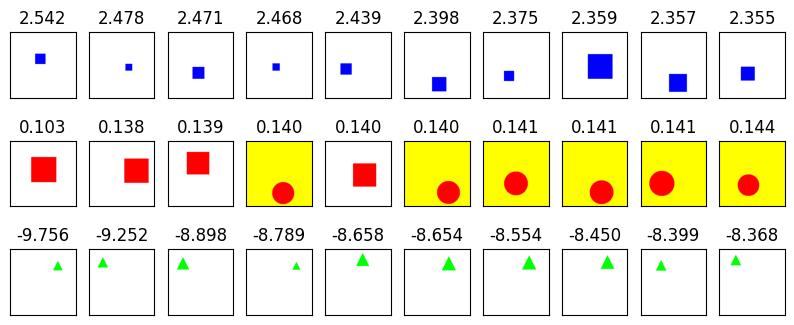

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. <d9>: 0.4093
	2. lime: 0.3741
	3. olive: 0.3740
	4. green: 0.3437
	5. four: 0.3363
	6. circular: 0.2976
	7. triangular: 0.2962
	8. outline: 0.2854
	9. three: 0.2385
	10. no: 0.2305
	11. round: 0.1234
	12. have: 0.1040
	13. color: 0.0861
	14. scarlet: 0.0778
	15. crimson: 0.0631
	16. with: 0.0591
	17. red: 0.0447
	18. fix: 0.0343
	19. shade: 0.0338
	20. blue: 0.0314
	21. locate: 0.0311
	22. background: 0.0282
	23. position: 0.0255
	24. figure: 0.0245
	25. azure: 0.0229
	26. unturn: 0.0155
	27. turn: 0.0151
	28. cyan: 0.0142
	29. unrotate: 0.0135
	30. canvas: 0.0122
	31. right: 0.0120
	32. this: 0.0102
	33. angle: 0.0093
	34. static: 0.0084
	35. that: 0.0061
	36. blank: 0.0053
	37. transparent: 0.0046
	38. white: 0.0030
	39. bottom: 0.0027
	40. picture: 0.0025
	41. form: 0.0024
	42. solid: 0.0016
	43. image:

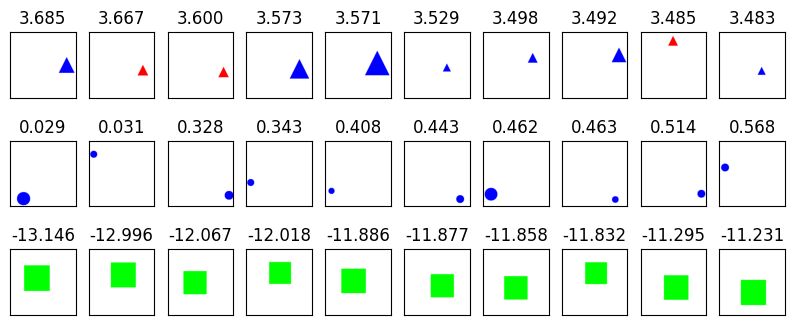

------------------------------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):
    visualize_concept(i)